In [1]:
import os 

import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# I - Introduction 

The project is centered around the question : "How can one determine if some water is potable or not ?" 
Our goal is to use Machine Learning to determine it. 
The dataset can be found here : https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

In [2]:
path_file = os.path.dirname(os.getcwd()) + "/datasets/water_potability/water_potability.csv"

In [3]:
df = pd.read_csv(path_file)

# II - Exploratory Data Analysis

### II.1 - Basic Stuff

In [4]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
print(f"The dataset has : \n -{df.shape[0]} rows \n -{df.shape[1]} columns")

The dataset has : 
 -3276 rows 
 -10 columns


In [6]:
print("The columns are the following : ")
print(df.columns.tolist())

The columns are the following : 
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


There are 10 columns : 9 for predictors and 1 for the target variable. According to the kaggle page, the description of the columns is the following : 
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

### I.2 - Looking for missing values

In [7]:
(df.isna().sum(axis = 0)/df.shape[0] * 100).sort_values(ascending = False)

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

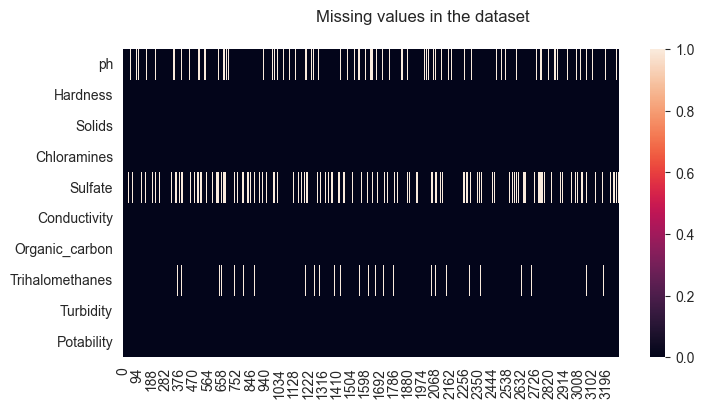

In [8]:
fig = plt.figure(figsize = (8,4))
sns.heatmap(df.isna().T)
plt.suptitle('Missing values in the dataset')
plt.show()

In [9]:
print(f"before dropping rows : {df.shape[0]}")
print(f"after dropping rows : {df.dropna(axis = 0).shape[0]}")
print(f"The remaining percentage of rows is : {round(df.dropna(axis = 0).shape[0]/df.shape[0],3)}")

before dropping rows : 3276
after dropping rows : 2011
The remaining percentage of rows is : 0.614


### I.3 - Predictors and target variable : relationships

In [10]:
df.dtypes.value_counts()

float64    9
int64      1
Name: count, dtype: int64

In [11]:
target_variable = "Potability"
col_predictors = [col for col in df.columns.tolist() if col != target_variable]

Text(0.5, 0.98, 'Correlation heatmap')

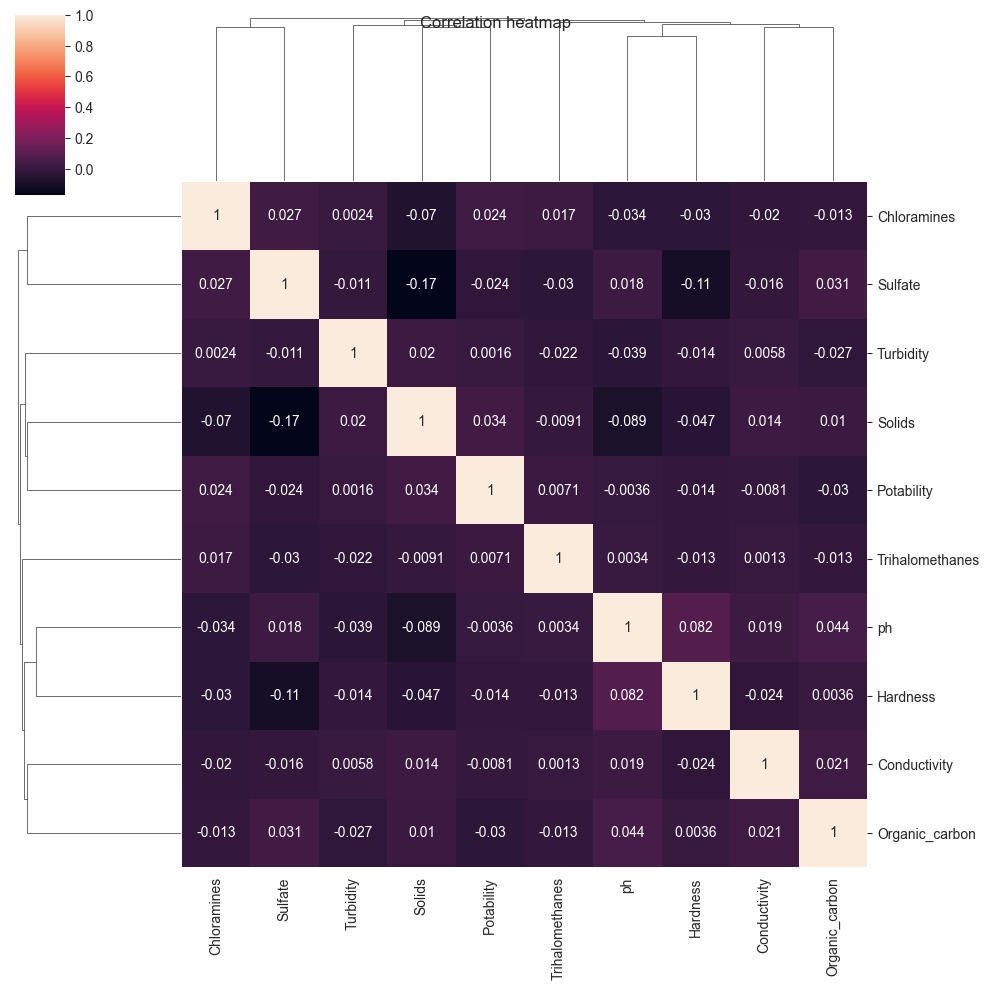

In [12]:
sns.clustermap(df.corr(), annot = True)
plt.suptitle("Correlation heatmap")

Nothing seems to be heavily correlated. Indeed, the highest (in absolute value) correlation seems to 0.2 and happens between solids and sulfate. The other correlations are around 0.0x which is very low 

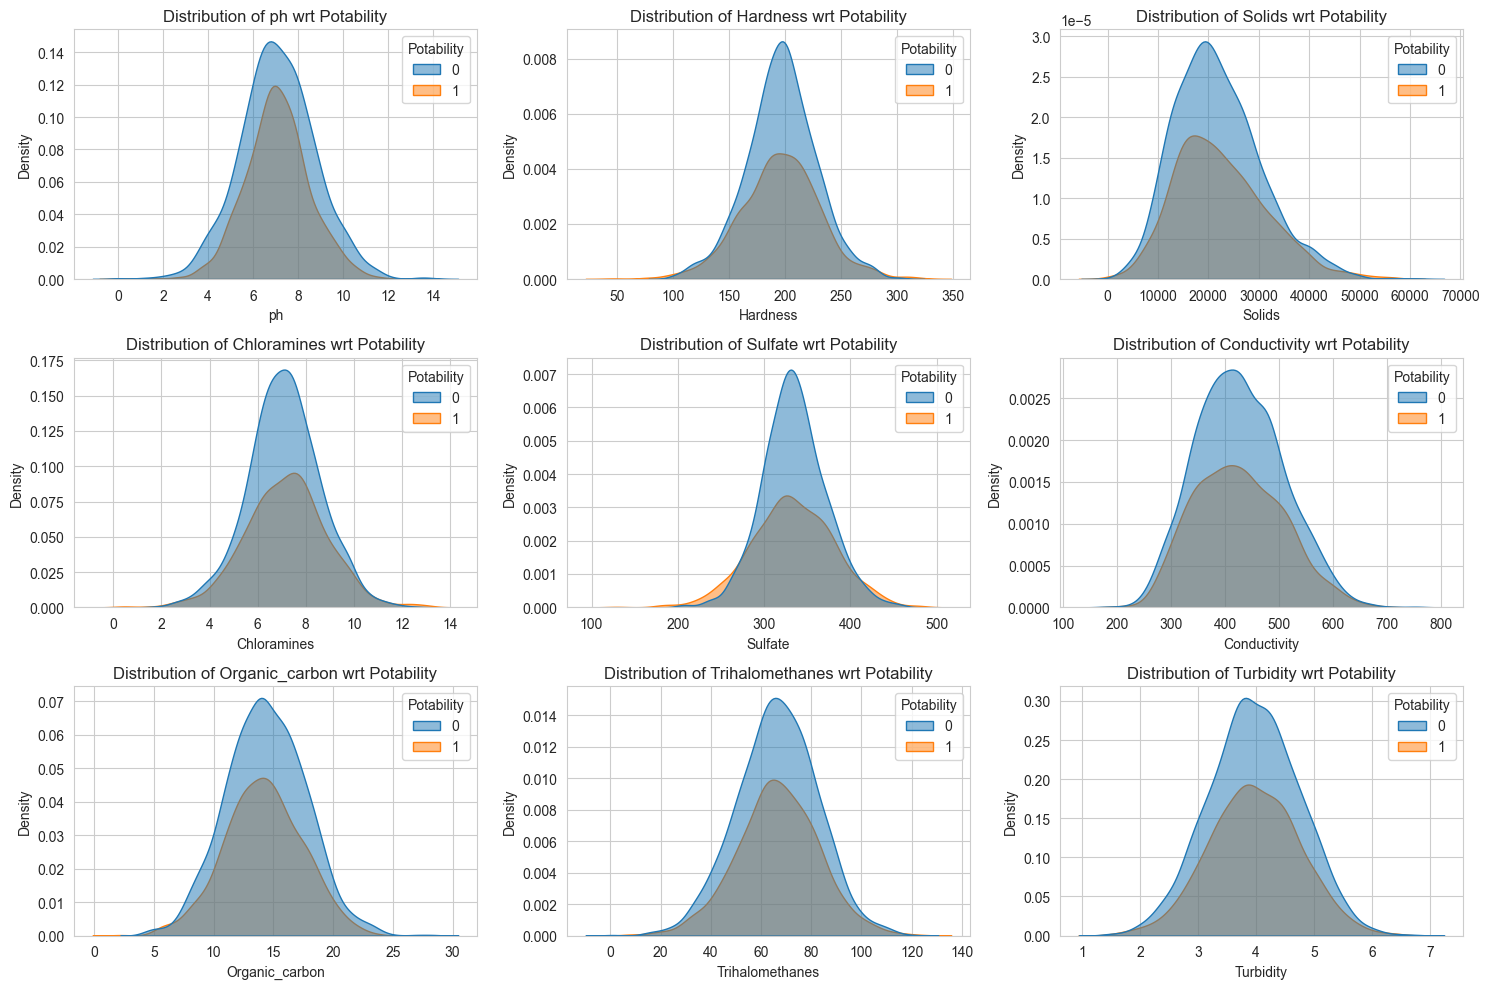

In [13]:
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

for k, col in enumerate(col_predictors):
    sns.kdeplot(
                data=df,
                x=col,
                hue=target_variable,
                fill=True, 
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )
    axes[k // n_cols, k % n_cols].set_title(f"Distribution of {col} wrt {target_variable}")

plt.tight_layout()
plt.show()

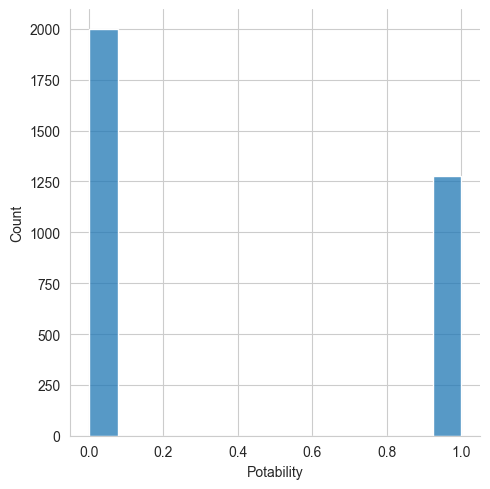

In [14]:
sns.displot(df.Potability)
plt.show()

We can remark that : 
- All of our features seems to have a "gaussian-like" distribution which make them suitable for all of our machine learning algorithms 
- The features have different scales. For example Sulfate goes from 100 to 500 whereas Ph goes from 0 to 14. Therefore, there is a need to standardize everything
- The distributions seem to change according to the value of the target variable 
- Our classes are unbalanced as there is 1250 instance of potable water against 2000 for non-potable thus 38% of the data is in the class 1 and 62% in the second class

### I.4 - Dimension Reduction and explained variance

In [15]:
pca_2 = PCA(n_components=2,svd_solver='full')
X = df[col_predictors].dropna()
y_temp = df.loc[X.index, target_variable]
X_pca = pca_2.fit_transform(X)

Text(0, 0.5, 'PCA2')

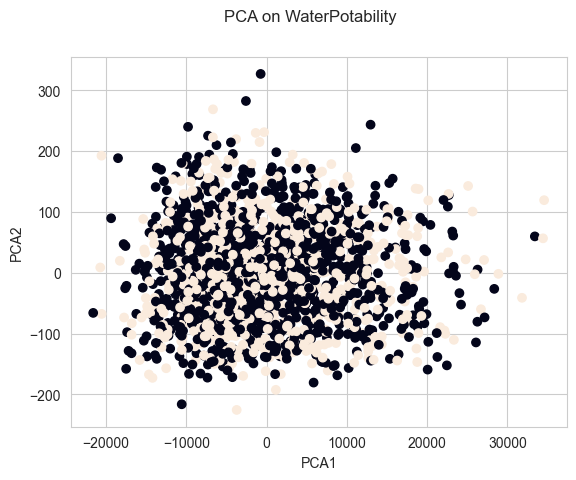

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_temp)
plt.suptitle("PCA on WaterPotability")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

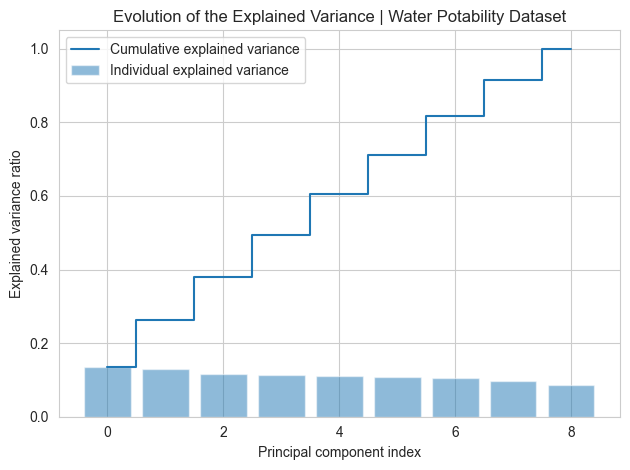

In [17]:
pca = PCA(svd_solver='full')
sc = StandardScaler()

sc.fit(X)
X_pca = pca.fit_transform(sc.transform(X))

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title("Evolution of the Explained Variance | Water Potability Dataset")
plt.tight_layout()
plt.show()

It seems that there is no way to reduce the dimension of our feature spaces as every component of the PCA would add the same explained variance. In fact, it's not surprising our features are not correlated.    
 The goal of the PCA is to use the SVD (Singular Value Decomposition)  to reduce the dimension of the problem by taking the directions (eigenvectors that maximizes the variance (eigen values).   
  However, in the case of uncorrelated data, each features gives interesting information and when properly scaled (we don't want or features to have different order of magnitudes because we are interested in *relative* changes and a change of 1 for one feature might have in reality more weight in the decision making than a change of 100 in another feature). Thus no direction (eigenvector) gives more information 

So far we have the following information : 
- The problem we want to deal with is a classification problem 
- The classes are unbalanced : 62% vs 38%
- There are 9 predictors for one target variable 
- We have roughly 300 more samples than features 
- Some features have missing values (Sulfate has up to 24% of missing values)
- Our features are normally distributed but each has a different scale than the other
- For the same feature, separating on the target variable, the density of the non potable is more concentrated around it's mean
- We can't reduce the dimension of our problem as each feature are pretty much uncorrelated with each other and the explained variance of each PCA components is roughly the same

## III - Trying Models

### III.1 - A first approach to model selection

According to what we saw earlier, we can't really decide which model to use. In fact if some models might take that much effort to be trained on (like decision trees don't need to pre-process the data or even a Xgboost which can deals with missing values). Therefore instead of *arbitrary* picking one model, we are going to take a bunch of them, test them and then take the best ones and see how they do on the dataset and then pick a few of them (the best ones) and try to increase their performances.

In [18]:
classifier_models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Support Vector Classifier (Linear)" : SVC(kernel = "linear"),
    "Gaussian Naive Bayes" : GaussianNB(),
    "KNN classifier" : KNeighborsClassifier(),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(random_state=42),
    "Xgboost Classifier" : XGBClassifier(random_state=42),
}

In [19]:
def make_roc_fig_classification_v2(dict_models : dict, X : pd.DataFrame, y : pd.DataFrame) -> plt.figure:
    """
    This function creates the figure of the roc curve

    Parameters:
    ----------
    dict_models : dict
        Map the name of the model to an instance

    X : pd.DataFrame
        The usual pandas dataframe of features

    y : pd.DataFrame
        The usual pandas dataframe of the target variable


    Returns
    ----------
        plt.figure
        roc curve figure
    """


    X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
    X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

    figure = plt.figure(figsize = (10,5))
    for model_name, model_instance in dict_models.items():
        model = model_instance.fit(X_train, y_train)

        if hasattr(model,"decision_function"):
            y_score = model.decision_function(X_val)
        elif hasattr(model,"predict_proba"):
             y_score = model.predict_proba(X_val)[:,1]
        else:
            print("error")

        _,_, threshold_array = roc_curve(y_val, y_score)

        fpr = []
        tpr = []

        if hasattr(model,"decision_function"):
            predict = model.decision_function(X_test)
        elif hasattr(model,"predict_proba"):
             predict = model.predict_proba(X_test)[:,1]
        else:
            print("error")


        for threshold in threshold_array:
            predicted_proba = np.where(predict >= threshold, 1, 0)
            tp = ((predicted_proba == 1) & (y_test == 1) ).sum()
            fp = ((predicted_proba == 1) & (y_test == 0) ).sum()
            tn = ((predicted_proba == 0) & (y_test == 0) ).sum()
            fn = ((predicted_proba == 0) & (y_test == 1) ).sum()

            if fp+fn == 0:
                fpr.append(0)
            else:
                fpr.append(fp/(fp + tn))
            if tp+fn == 0:
                tpr.append(0)
            else:
                tpr.append(tp/(tp + fn))

        roc_auc = auc(fpr, tpr)

        plt.plot(
                fpr,
                tpr,
                linestyle = '-',
                label = f"{model_name} | AUC = {round(roc_auc,3)}",
                alpha = 0.8
            )

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR : False Positive Rate ---->")
    plt.ylabel("TPR : True Positive Rate ---->")
    plt.title(f"ROC Curve for different models")
    plt.legend()

In [20]:
def make_learning_curve_fig(dict_models : dict, X : pd.DataFrame, y : pd.DataFrame) -> plt.figure:
    common_params = {
        "X" : X.values,
        "y" : y.values,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }

    fig, ax = plt.subplots(nrows=1, ncols=len(classifier_models.keys()), figsize=(22, 4), sharey=True)
    fig.suptitle(f"Learning Curve")
    
    for ax_idx, estimator in enumerate(dict_models.values()):
        LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
        handles, label = ax[ax_idx].get_legend_handles_labels()
        ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
        ax[ax_idx].set_title(f"{estimator.__class__.__name__}")
    

In [21]:
df_temp = df.copy(deep = True)
df_temp.dropna(inplace = True)

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


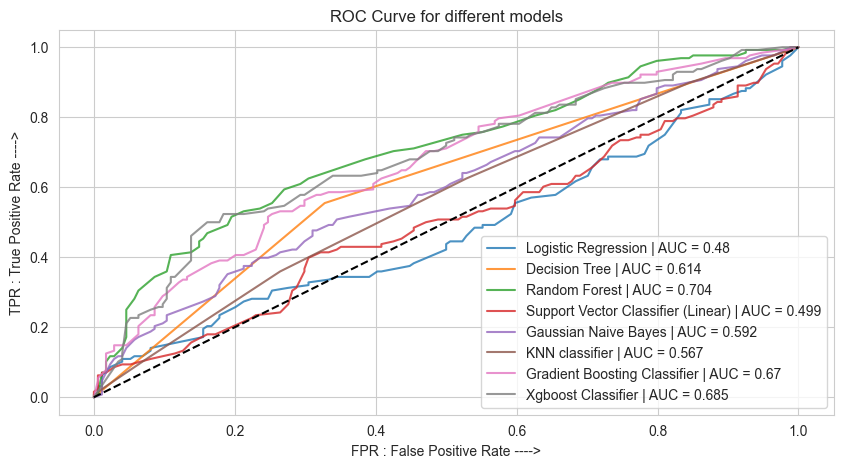

In [22]:
make_roc_fig_classification_v2(classifier_models,X,y)

In [23]:
X_standard = StandardScaler().fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns = col_predictors)

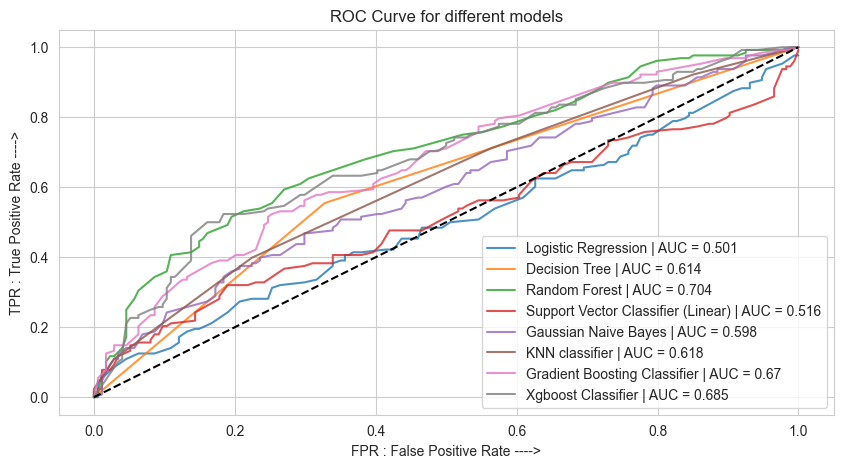

In [24]:
make_roc_fig_classification_v2(classifier_models,X_standard,y)

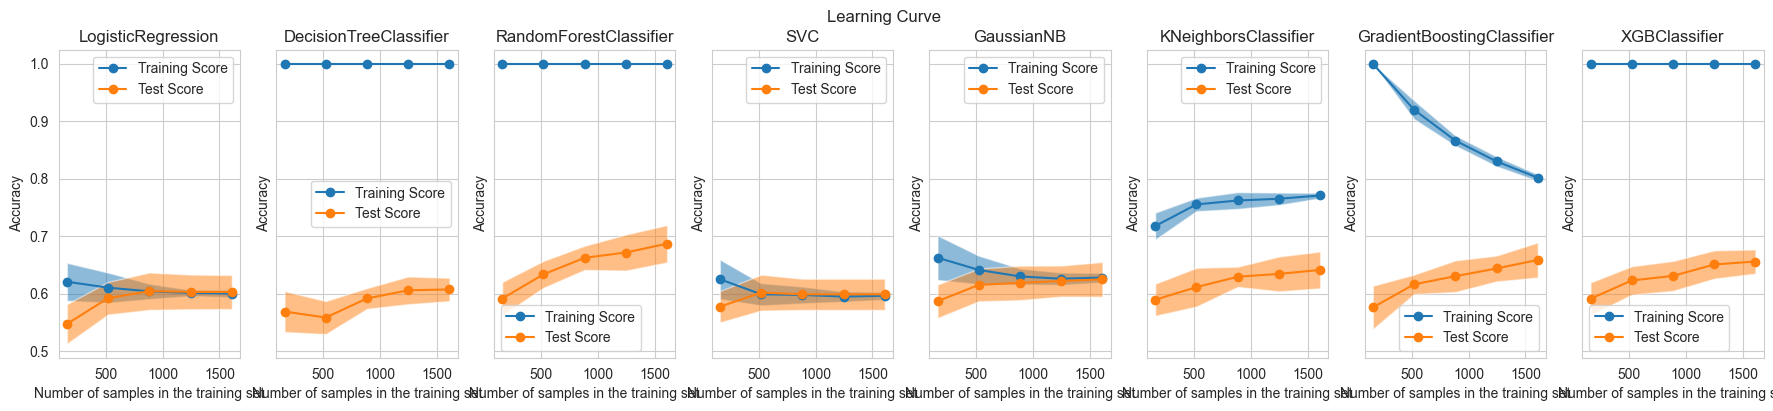

In [25]:
make_learning_curve_fig(classifier_models, X_standard,y)

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

dic_roc_models_non_standard = {}
dic_auc_models_non_standard = {}
dic_feature_importance_non_standard = {}
for model_name,model_instance in classifier_models.items():
    model = model_instance.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_val)
    elif hasattr(model,"predict_proba"):
        y_score = model.predict_proba(X_val)[:,1]
    else:
        print("error")
        
    fpr,tpr, threshold_array = roc_curve(y_val, y_score)
    
    if hasattr(model,"decision_function"):
        predict = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
        predict = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    dic_roc_models_non_standard[f"{model_name}"] = auc(fpr, tpr)
    dic_auc_models_non_standard[f"{model_name}"] = accuracy_score(y_test, model.predict(X_test))
    if hasattr(model,"feature_importances_"):
        dic_feature_importance_non_standard[f"{model_name}"]  = pd.DataFrame(model.feature_importances_, index = col_predictors, columns = ['feature importance']) 
    
X_train, X_temp, y_train, y_temp = train_test_split(X_standard.values, y.values, test_size = 0.3, random_state=42) 
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

dic_roc_models_standard = {}
dic_auc_models_standard = {}
dic_feature_importance_standard = {}
for model_name,model_instance in classifier_models.items():
    model = model_instance.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_val)
    elif hasattr(model,"predict_proba"):
        y_score = model.predict_proba(X_val)[:,1]
    else:
        print("error")
        
    fpr,tpr, threshold_array = roc_curve(y_val, y_score)
    
    if hasattr(model,"decision_function"):
        predict = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
        predict = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    dic_roc_models_standard[f"{model_name}"] = auc(fpr, tpr)
    dic_auc_models_standard[f"{model_name}"] = accuracy_score(y_test, model.predict(X_test))
    if hasattr(model,"feature_importances_"):
        dic_feature_importance_standard[f"{model_name}"] = pd.DataFrame(model.feature_importances_, index = col_predictors, columns = ['feature importance']) 
    else:
        print("error")

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


error
error
error
error


In [27]:
dic_feature_importance_non_standard["Decision Tree"]

,feature importance
ph,0.141145
Hardness,0.112090
Solids,0.108138
Chloramines,0.153937
Sulfate,0.170601
Conductivity,0.084938
Organic_carbon,0.068119
Trihalomethanes,0.101080
Turbidity,0.059952


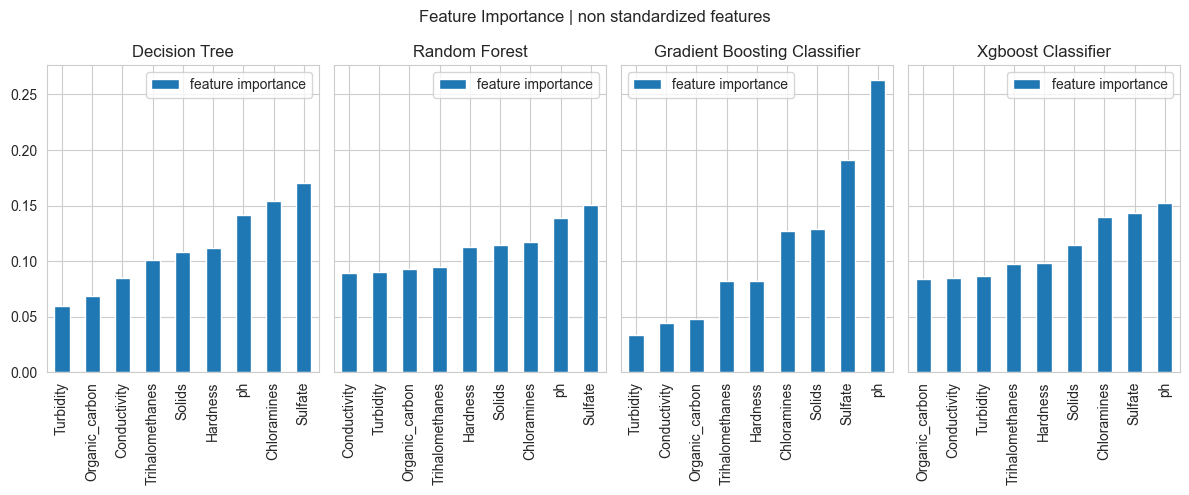

In [28]:
n_rows = 1
n_cols = len(dic_feature_importance_non_standard)

fig,axes = plt.subplots(figsize = (12,5), nrows = n_rows, ncols = n_cols,sharey=True)
k = 0
for i, (model_name, df_importance) in enumerate(dic_feature_importance_non_standard.items()):
    ax = axes[i]
    df_importance.sort_values(by = ["feature importance"]).plot.bar(ax=ax)
    ax.set_title(model_name)

plt.suptitle("Feature Importance | non standardized features")
plt.tight_layout()
plt.show()

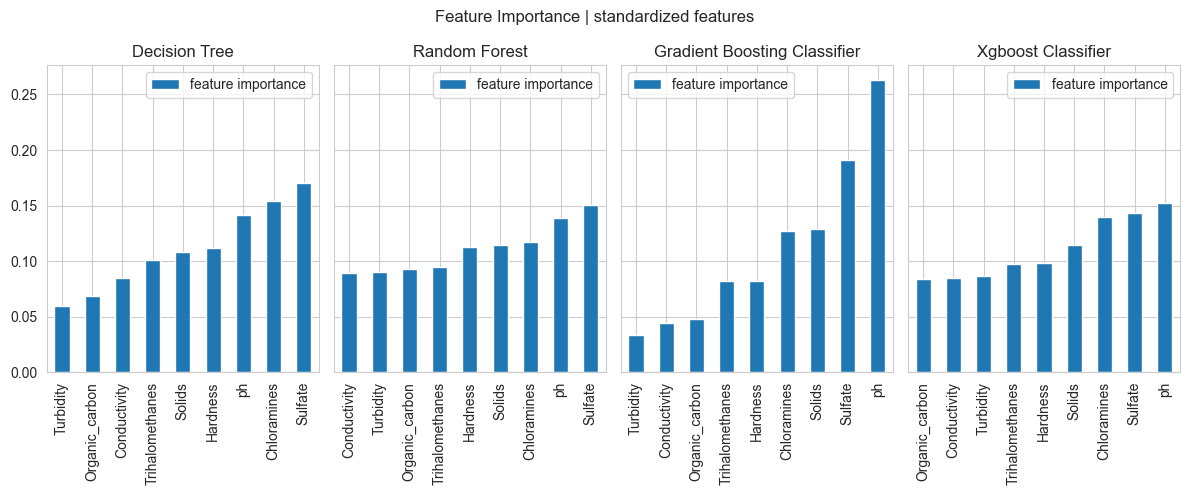

In [29]:
n_rows = 1
n_cols = len(dic_feature_importance_standard)

fig,axes = plt.subplots(figsize = (12,5), nrows = n_rows, ncols = n_cols,sharey=True)
k = 0
for i, (model_name, df_importance) in enumerate(dic_feature_importance_standard.items()):
    ax = axes[i]
    df_importance.sort_values(by = ["feature importance"]).plot.bar(ax=ax)
    ax.set_title(model_name)

plt.suptitle("Feature Importance | standardized features")
plt.tight_layout()
plt.show()

In [30]:
dic_roc_models_standard

{'Logistic Regression': 0.44746815213917174,
 'Decision Tree': 0.5780557965389708,
 'Random Forest': 0.7024565088352129,
 'Support Vector Classifier (Linear)': 0.4741336012054244,
 'Gaussian Naive Bayes': 0.5672343728596868,
 'KNN classifier': 0.6797178211040593,
 'Gradient Boosting Classifier': 0.6438975389251632,
 'Xgboost Classifier': 0.6821606319346148}

In [31]:
dic_roc_models_non_standard

{'Logistic Regression': 0.5069631523674718,
 'Decision Tree': 0.5780557965389708,
 'Random Forest': 0.7024565088352129,
 'Support Vector Classifier (Linear)': 0.4232226838957125,
 'Gaussian Naive Bayes': 0.567827953061504,
 'KNN classifier': 0.49098214693392994,
 'Gradient Boosting Classifier': 0.6438975389251632,
 'Xgboost Classifier': 0.6821606319346148}

In [32]:
dic_feature_importance_standard

{'Decision Tree':                  feature importance
 ph                         0.141145
 Hardness                   0.112090
 Solids                     0.108138
 Chloramines                0.153937
 Sulfate                    0.170601
 Conductivity               0.084938
 Organic_carbon             0.068119
 Trihalomethanes            0.101080
 Turbidity                  0.059952,
 'Random Forest':                  feature importance
 ph                         0.139201
 Hardness                   0.113022
 Solids                     0.114144
 Chloramines                0.117051
 Sulfate                    0.150541
 Conductivity               0.088927
 Organic_carbon             0.092638
 Trihalomethanes            0.094672
 Turbidity                  0.089804,
 'Gradient Boosting Classifier':                  feature importance
 ph                         0.262960
 Hardness                   0.082301
 Solids                     0.128636
 Chloramines                0.127482
 Sulfat

In [33]:
df_roc = pd.concat(
    [
        pd.DataFrame(
                    dic_roc_models_non_standard.items(),
                     columns=['Models', 'AUC (non standardized features)']
                    ).set_index('Models'),
        pd.DataFrame(
                    dic_roc_models_standard.items(),
                     columns=['Models', 'AUC (standardized features)']
                    ).set_index('Models'),
    ],
    axis=1
)


df_accuracy = pd.concat(
    [
        pd.DataFrame(
                    dic_auc_models_non_standard.items(),
                     columns=['Models', 'accuracy (non standardized features)']
                    ).set_index('Models'),
        pd.DataFrame(
                    dic_auc_models_standard.items(),
                     columns=['Models', 'accuracy (standardized features)']
                    ).set_index('Models')
    ],
    axis=1
)

In [34]:
df_accuracy

,accuracy (non standardized features),accuracy (standardized features)
Models,,
Logistic Regression,0.579470,0.589404
Decision Tree,0.622517,0.622517
Random Forest,0.678808,0.678808
Support Vector Classifier (Linear),0.599338,0.576159
Gaussian Naive Bayes,0.609272,0.609272
KNN classifier,0.576159,0.615894
Gradient Boosting Classifier,0.642384,0.642384
Xgboost Classifier,0.668874,0.668874


In [35]:
df_roc

,AUC (non standardized features),AUC (standardized features)
Models,,
Logistic Regression,0.506963,0.447468
Decision Tree,0.578056,0.578056
Random Forest,0.702457,0.702457
Support Vector Classifier (Linear),0.423223,0.474134
Gaussian Naive Bayes,0.567828,0.567234
KNN classifier,0.490982,0.679718
Gradient Boosting Classifier,0.643898,0.643898
Xgboost Classifier,0.682161,0.682161


The AUC is our metric to define "what's our best model ?"       
 Looking at the results, we wish to keep : 
 - Random Forest Classifier
 - Xgboost Classifier
 - Knn Classifier 
 - Gradient Boosting Classifier  

What we can remark on those models is that they are mostly tree based models (Random Forest, Xgboost and Gradient Boosting) or distance based models : K-Nearest Neighbours. It seems that all other linear models such as a logistic regression or a support vector classifier didn't work that much.
                

### III.2 - Random Forest classifier 

In this subsection we are interested in one specific model, the random forest classifier. With the less amount of work, it's the most promising model for our task    
As the random forest classifier is a tree based model, the standardization of data doesn't have any 

#### III.2.1 - Principle of a random forest classifier

A random Forest Classifier is a tree based model. It goes from the idea that a decision tree : 
- is a high variance model 
- can easily overfit     
   
Therefore, one way to overcome this issue is through **bagging**.         
Instead of using one trees, we can use multiple trees and instead of using the whole dataset for each tree we can take a subset defined through bootstrapping for each trees.

#### III.2.2 - First parameter : number of trees

In [36]:
df_temp = df.copy(deep = True)

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]

X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

In [37]:
number_tress = np.linspace(10,500, 40, dtype= int)
model_arr = []
auc_model = []

In [38]:
for n_tree in number_tress:
    model_arr.append(RandomForestClassifier(
                                                random_state=42,
                                                n_estimators= n_tree
                                            )
                    )
    model_arr[-1].fit(X_train, y_train)
    
    y_score = model_arr[-1].predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    auc_model.append(auc(fpr, tpr))

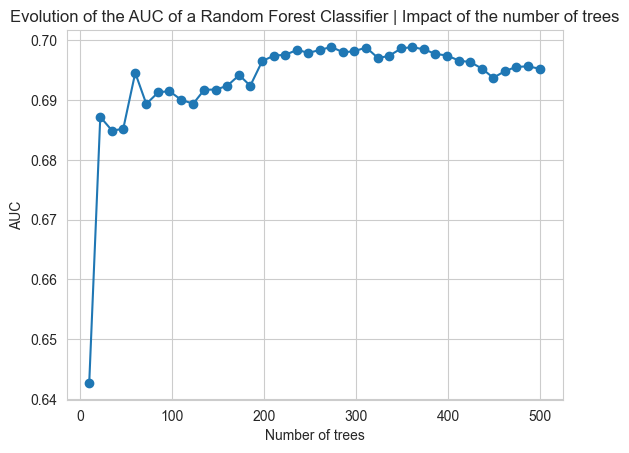

In [39]:
plt.plot(number_tress, auc_model,marker='o')
plt.grid(True)
plt.xlabel("Number of trees")
plt.ylabel("AUC")
plt.title("Evolution of the AUC of a Random Forest Classifier | Impact of the number of trees")
plt.show()

We tested our random forest classifier by tweaking the parameter of the number of trees       
However it seems that tweaking only this parameter doesn't give that many results as the AUC : 
- doesn't change that much : from 0.64 to 0.7
- hit a plateau at something like 200 trees

#### III.2.3 - Second parameter : split criterion

The next parameter we might want to tweak is the split criterion. Indeed, for a decision tree to decide if the split is good or not, it must have a metric (please find a better way to phrase it)

In [40]:
df_temp = df.copy(deep = True)

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]

X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

In [41]:
number_tress = np.linspace(50,230, 8, dtype= int)
criterion_arr = ['gini', 'entropy','log_loss']

dic_auc = {}

In [42]:
for criterion in criterion_arr:
    dic_auc[criterion] = []
    for n_tree in number_tress:
        model = RandomForestClassifier(
                                        random_state=42,
                                        n_estimators= n_tree,
                                        criterion=criterion
                                        )
     
        model.fit(X_train, y_train)
    
        y_score = model.predict_proba(X_test)[:,1]
    
        fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
        dic_auc[criterion].append(auc(fpr, tpr))

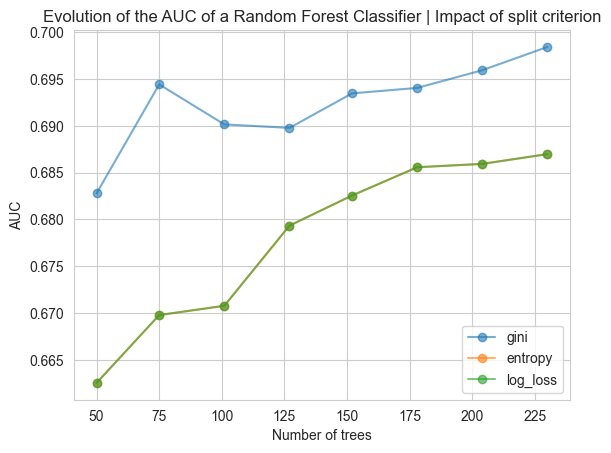

In [43]:
for criterion in criterion_arr:
    plt.plot(number_tress,dic_auc[criterion], marker='o', label = criterion, alpha = 0.6)
plt.grid(True)
plt.xlabel("Number of trees")
plt.ylabel("AUC")
plt.title("Evolution of the AUC of a Random Forest Classifier | Impact of split criterion")
plt.legend()
plt.show()

It seems like the best split criterion is the gini value 

#### III.2.3 - Third parameter : max depth

In [44]:
df_temp = df.copy(deep = True)

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]

X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

In [45]:
number_tress = np.linspace(50,230, 8, dtype= int)
max_depth_arr = [1,2,3,4,5,6,10,20,30,50,100]

dic_auc = {}

In [46]:
for max_depth in max_depth_arr:
    dic_auc[max_depth] = []
    for n_tree in number_tress:
        model = RandomForestClassifier(
                                        random_state=42,
                                        n_estimators= n_tree,
                                        criterion = "gini",
                                        max_depth= max_depth
                                        )
     
        model.fit(X_train, y_train)
    
        y_score = model.predict_proba(X_test)[:,1]
    
        fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
        dic_auc[max_depth].append(auc(fpr, tpr))

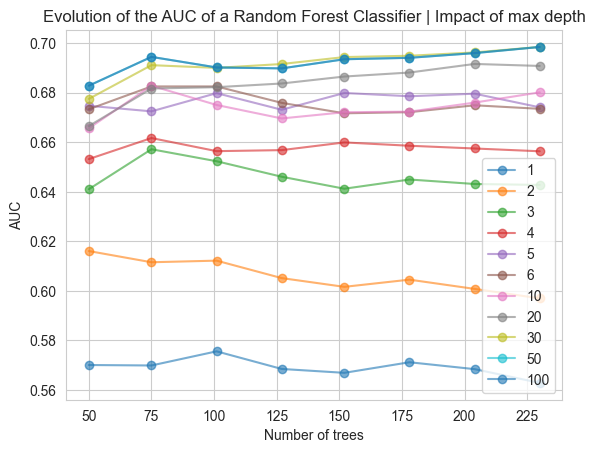

In [47]:
for max_depth in max_depth_arr:
    plt.plot(number_tress,dic_auc[max_depth], marker='o', label = max_depth, alpha = 0.6)
plt.grid(True)
plt.xlabel("Number of trees")
plt.ylabel("AUC")
plt.title("Evolution of the AUC of a Random Forest Classifier | Impact of max depth")
plt.legend()
plt.show()

#### III.2.4 - Fourth parameter : pruning

#### III.2.5 - Finding the best combination of parameters through gridsearch 

In [48]:
df_temp = df.copy(deep = True)

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 

In [49]:
max_depth_arr = [1,5,10,20,30,50,100, None]
criterion_arr = ['gini', 'entropy','log_loss']
n_estimators_arr = [30,50,100,150,200,220]
max_features_arr = ["sqrt", "log2", None]

In [50]:
opti_param = {'max_depth' : max_depth_arr,
              'criterion' : criterion_arr,
              'n_estimators' : n_estimators_arr,
              'max_features' : max_features_arr,
              }

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
                   param_grid = opti_param,
                    scoring = "roc_auc",
                    cv = 5,
                    n_jobs=-1
                   )

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, 30, 50, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [30, 50, 100, 150, 200, 220]},
             scoring='roc_auc')

In [53]:
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Score: 0.6684595146862053
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 150}


In [54]:
y_pred = best_model.predict(X_test)
print("Test AUC:", roc_auc_score(y_test, y_pred))

Test AUC: 0.6141540682484434


### III.3 - K-Nearest Neighbors Classifier

#### III.3.1 - Principle of K-NN

In [63]:
df_temp = df.copy(deep = True)
df_temp.dropna(inplace = True)
sc = StandardScaler() 

target_variable = "Potability"
col_predictors = [col for col in df_temp.columns if col != target_variable]

X, y = df_temp[col_predictors], df_temp[target_variable]
X = pd.DataFrame(sc.fit_transform(X), columns = col_predictors)

X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values, test_size = 0.3, random_state=42) 
X_test, X_val,y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=69)

In [82]:
neighbors_arr = [1,2,3,4,5,10,20,50,75,100,125,150,200]
auc_neighbor = []

In [83]:
for n_neighbor in neighbors_arr:
    model = KNeighborsClassifier(
                                    n_neighbors= n_neighbor,
                                    )
     
    model.fit(X_train, y_train)
    
    y_score = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    auc_neighbor.append(auc(fpr, tpr))

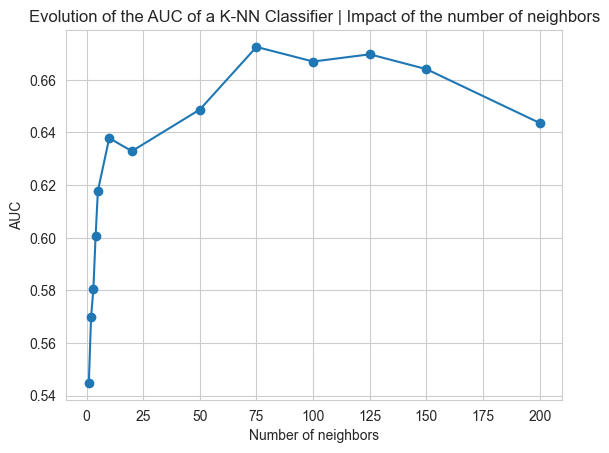

In [84]:
plt.plot(neighbors_arr, auc_neighbor,marker='o')
plt.grid(True)
plt.xlabel("Number of neighbors")
plt.ylabel("AUC")
plt.title("Evolution of the AUC of a K-NN Classifier | Impact of the number of neighbors")
plt.show()

#### III.3.2 - First parameter : number of neighbors

### III.4 - Xgboost classifier

### III.5 - Gradient Boosting Classifier

### III.6 - Meta model through stacking of the best models used so far 